In [400]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import seaborn as sns
from matplotlib import colors

First, I create a programme that generates a number spiral of dimension n. I also create a function that outputs whether x is prime, and use this to create a visualisation of the distribution of primes in the spiral by highlighting the elements of the spiral different colours depending on if they are prime or composite. 

The spiral is:  [[15377. 15376. 15375. ... 15255. 15254. 15253.]
 [15378. 14885. 14884. ... 14764. 14763. 15252.]
 [15379. 14886. 14401. ... 14281. 14762. 15251.]
 ...
 [15499. 15006. 14521. ... 14641. 14642. 15131.]
 [15500. 15007. 15008. ... 15128. 15129. 15130.]
 [15501. 15502. 15503. ... 15623. 15624. 15625.]]


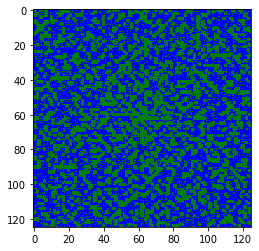

In [401]:
n=125
grid=np.zeros((n,n))
count=1
index_i=int((n-1)/2)
index_j=int((n-1)/2)
grid[index_i][index_j]=1
right=True
left=False
up=False
down=False
change=False
count_2=1
complete=False

for i in range((2*n)-1): 
    complete=False
    for j in range(count_2): 
        count=count+1
        if (right==True):
           index_j=index_j+1
         
        if (left==True):
           index_j=index_j-1
        if (up==True):

            index_i=index_i-1
        if (down==True):
            index_i=index_i+1

        grid[index_i][index_j]=count 
        
    if (right==True):
        right=False
        left=False
        up=True
        down=False
        complete=True
    if ((up==True) and (complete==False)):
        right=False
        left=True
        up=False
        down=False
        complete=True
    if ((left==True) and (complete==False)):
        right=False
        left=False
        up=False
        down=True
        complete=True
    if ((down==True) and (complete==False)):
        right=True
        left=False
        up=False
        down=False
        complete=True

    if (((i%2)==1) and (i<(2*n)-3)):
        count_2=count_2+1
           
print("The spiral is: " ,grid)

def Prime(x): 
    Prime=True
    if (x==1):
        Prime=False
    for i in range(2,int(x)):
        if ((x%i)==0):
            Prime=False
    return Prime

grid_copy=grid
for i in range(n):
    for j in range (n):
        value=Prime(grid[i][j])
        if (value==True):
            grid_copy[i][j]=0
        else: 
            grid_copy[i][j]=1

cmap=colors.ListedColormap(['green','blue'])
bounds=[0,1]
norm=colors.BoundaryNorm(bounds,cmap.N)
fig=plt.subplots()
plt.imshow(grid_copy, cmap=cmap,norm=norm)

I adapt my program to generate random numbers up to n^2 in the positions of the spiral instead of incrementing by 1 at each position. This allows me to compare to the original case and so determine whether there is a pattern in the distribution of primes.

In [402]:
n=125
grid=np.zeros((n,n))
count=1
index_i=int((n-1)/2)
index_j=int((n-1)/2)
grid[index_i][index_j]=1
right=True
left=False
up=False
down=False
change=False
count_2=1
complete=False

for i in range((2*n)-1):
   
    complete=False
    for j in range(count_2): 
        count=count+1
        if (right==True):
           index_j=index_j+1
         
        if (left==True):
           index_j=index_j-1
        if (up==True):

            index_i=index_i-1
        if (down==True):
            index_i=index_i+1
        
        grid[index_i][index_j]=np.random.randint(1,(n*n)+1)
        

    if (right==True):
        right=False
        left=False
        up=True
        down=False
        complete=True
    if ((up==True) and (complete==False)):
        right=False
        left=True
        up=False
        down=False
        complete=True
    if ((left==True) and (complete==False)):
        right=False
        left=False
        up=False
        down=True
        complete=True
    if ((down==True) and (complete==False)):
        right=True
        left=False
        up=False
        down=False
        complete=True

    if (((i%2)==1) and (i<(2*n)-3)):
        count_2=count_2+1   
        
print("The spiral is " ,grid)

def Prime(x): 
    Prime=True
    if (x==1):
        Prime=False
    for i in range(2,int(x)):
        if ((x%i)==0):
            Prime=False
    return Prime

grid_copy=grid
for i in range(n):
    for j in range (n):
        value=Prime(grid[i][j])
        if (value==True):
            grid_copy[i][j]=0
        if (value==False):
            grid_copy[i][j]=1
        
cmap=colors.ListedColormap(['green','blue'])
bounds=[0,1]
norm=colors.BoundaryNorm(bounds,cmap.N)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
fig=plt.subplots()
plt.imshow(grid_copy, cmap=cmap,norm=norm)

The spiral is  [[ 5061.  2116. 10434. ...  9067. 13277.  3440.]
 [  478. 13905.  4733. ...  8586. 10437.  4682.]
 [14064.  2414.  9754. ... 10363.  1722.  9175.]
 ...
 [ 5687. 12802.   227. ... 13351.  5297. 11239.]
 [ 1617.  9689. 12537. ... 11208.  1073.  7518.]
 [12610.   949.  1573. ...  7970.  3539. 14972.]]


I define a function which, given the coefficients a,b,c and the value x, computes ax^2+bx+c. If we call this function f, for specific a,b,c, I then find the number of primes in f(1),...f(100). I also find the number of primes in 1,2..f(100), and use this values to find the proprotion of primes in f(1),..f(100) and in 1,2...f(100) respectively. 

In [ ]:
def func(x,a,b,c):
    return (a*(x**2)+b*x+c)

stop=func(100,8,-3,7)
no_prime_poly=0
no_prime=0
for i in range (101):
    number=func(i,4,-2,1)
    val=Prime(number)
    if (val==True):
        no_prime_poly=no_prime_poly+1
      
for i in range(stop+1):
    val=Prime(i)
    if (val==True):
        no_prime=no_prime+1
       
proportion_prime_poly=0
proportion_prime=0

proportion_prime_poly=no_prime_poly/100
proportion_prime=no_prime/stop

print("The proportion of f(1),..f(100) that are prime is: " ,proportion_prime_poly)
print("The proportion of 1,2,..f(100) that are prime is: " ,proportion_prime)
  

KeyboardInterrupt: 

For values of a,b,c each ranging from 1 to 5, I find for f(x)=ax^2+bx+c the proportion of f(1),...f(100) that are prime and the proportion of 1,2,...f(100) that are prime. I store my results in an array. For each such polynomial, I divide the proportion of f(1),..f(100) that are prime bby the proportion of 1,2,...f(100) that are prime to get an estimate for the ratio of numbers generated by the function being prime in comparison to any number up to f(100) being prime. 

In [ ]:
results=np.zeros((5,5,5))
count=0
total=0
for i in range (1,6):
    
    for j in range(1,6):
        for k in range(1,6):
            stop=func(100,i,j,k)
            no_prime_poly=0
            no_prime=0
            for m in range (101):
                number=func(m,i,j,k)
                val=Prime(number)
                if (val==True):
                    no_prime_poly=no_prime_poly+1

                
            for m in range(stop+1):
                val=Prime(m)
                if (val==True):
                    no_prime=no_prime+1

            proportion_prime_poly=no_prime_poly/100
            proportion_prime=no_prime/stop
            results[i-1][j-1][k-1]=proportion_prime_poly/proportion_prime
            if (results[i-1][j-1][k-1]>1):
                count=count+1
            total=total+1

print(count, "of the " ,total, "polynomials generated values more likely to be prime than general numbers from 1,2,..f(100)")
            


76 of the  125 polynomials generated values more likely to be prime than general numbers from 1,2,..f(100)


I find the maximum number in my results array and its corresponding i,j and k indexes. This shows me the polynomial out of those I considered which generates the most primes.

In [ ]:
index_1=0
index_2=0
index_3=0
max=0 
for i in range(5):
    for j in range(5):
        for k in range(5):
            if (results[i][j][k]>max):
                max=results[i][j][k]
                index_1=i
                index_2=j
                index_3=k
print("The maximum proportion was: " ,max, "with i,j,k indexes respectively: " ,index_1, index_2, index_3)

The maximum proportion was:  4.777121621621621 with i,j,k indexes respectively:  4 4 0


I now adapt my function so the spiral only consists of odd numbers to see if I observe the same patterns.

The spiral is:  [[30753. 30751. 30749. ... 30509. 30507. 30505.]
 [30755. 29769. 29767. ... 29527. 29525. 30503.]
 [30757. 29771. 28801. ... 28561. 29523. 30501.]
 ...
 [30997. 30011. 29041. ... 29281. 29283. 30261.]
 [30999. 30013. 30015. ... 30255. 30257. 30259.]
 [31001. 31003. 31005. ... 31245. 31247. 31249.]]


<Figure size 1200x800 with 0 Axes>

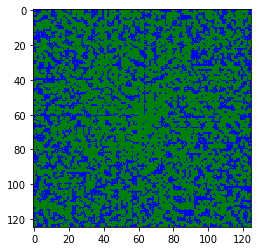

In [ ]:
n=125
grid=np.zeros((n,n))
count=1
index_i=int((n-1)/2)
index_j=int((n-1)/2)
grid[index_i][index_j]=1
right=True
left=False
up=False
down=False
change=False
count_2=1
complete=False

for i in range((2*n)-1):
   
    complete=False
    for j in range(count_2): 
        count=count+2
        if (right==True):
           index_j=index_j+1
         
        if (left==True):
           index_j=index_j-1
        if (up==True):

            index_i=index_i-1
        if (down==True):
            index_i=index_i+1
        
        grid[index_i][index_j]=count
        

    if (right==True):
        right=False
        left=False
        up=True
        down=False
        complete=True
    if ((up==True) and (complete==False)):
        right=False
        left=True
        up=False
        down=False
        complete=True
    if ((left==True) and (complete==False)):
        right=False
        left=False
        up=False
        down=True
        complete=True
    if ((down==True) and (complete==False)):
        right=True
        left=False
        up=False
        down=False
        complete=True

    if (((i%2)==1) and (i<(2*n)-3)):
        count_2=count_2+1
    
print("The spiral is: " ,grid)

def Prime(x): 
    Prime=True
    if (x==1):
        Prime=False
    for i in range(2,int(x)):
        if ((x%i)==0):
            Prime=False
    return Prime

grid_copy=grid
for i in range(n):
    for j in range (n):
        value=Prime(grid[i][j])
        if (value==True):
            grid_copy[i][j]=0
        if (value==False):
            grid_copy[i][j]=1
        
cmap=colors.ListedColormap(['green','blue'])
bounds=[0,1]
norm=colors.BoundaryNorm(bounds,cmap.N)
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
fig, ax=plt.subplots()
ax.imshow(grid_copy, cmap=cmap,norm=norm)